# Single-Unit Activity from Internal Globus Pallidus of Macaques During Reaching tutorial 

This tutorial demonstrates how to access an NWB file from the [DANDI:000947](https://dandiarchive.org/dandiset/000947/draft) dandiset using `pynwb` and `dandi`.

This dataset contains recordings of single-unit activity from globus pallidus-internus (GPi) in monkeys performing
a choice reaction time reaching task. It contains data from two monkeys before and after the administration of MPTP (1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine), which induces Parkinsonism. The neuronal activity was recorded using 16-contact linear probes (0.5–1.0 MΩ, V-probe, Plexon) or glass-insulated tungsten microelectrodes (0.5–1.5 MΩ, Alpha Omega). The neuronal data were amplified (4×, 2 Hz–7.5 kHz) and digitized at 24.414 kHz (approx., 16-bit resolution; Tucker Davis Technologies). The neuronal data were high-pass filtered (Fpass: 200 Hz, Matlab FIRPM) and thresholded, and candidate action potentials were sorted into clusters in principal components space (Off-line Sorter, Plexon).

Contents:

- [Streaming NWB files](#stream-nwb)
- [Access Subject metadata](#access-subject)
- [Access Trials](#access-trials)
- [Access Recording](#access-recording)
- [Access Units](#access-units)
- [View PSTH](#view-PSTH)


# Streaming NWB files <a name="stream-nwb"></a>

This section demonstrates how to access the files on the [DANDI Archive](https://dandiarchive.org) without downloading them.

Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from PyNWB.

The `dandi.dandiapi.DandiAPIClient` can be used to get the S3 URL of the NWB file stored in the DANDI Archive.



In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient.for_dandi_instance("dandi")

dandiset_id = "000947"
file_path = "sub-Isis/sub-Isis_ses-post-MPTP-I-190118-6_ecephys.nwb"

with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(file_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

We will use `remfile` for streaming the file. You can read more about `remfile` at [this tutorial section](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html#method-3-remfile).

In [2]:
import h5py
from pynwb import NWBHDF5IO
import remfile

# We stream the file using remfile and open it with h5py and pynwb
file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")

io = NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x6141305744
Fields:
  acquisition: {
    ElectricalSeries <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    DeviceEcephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Group GPi <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: This dataset contains recordings of single-unit activity from globus pallidus-internus (GPi) in MPTP
(1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine)-induced monkeys performing a choice reaction time reaching task.
The neuronal activity was recorded using 16-contact linear probes (0.5–1.0 MΩ, V-probe, Plexon) or glass-insulated
tungsten microelectrodes (0.5–1.5 MΩ, Alpha Omega). The neuronal data were amplified (4×, 2 Hz–7.5 kHz) and
digitized at 24.414 kHz (approx., 16-bit resolution; Tucker Davis Technologies).
The neuronal data were high-pass filtered (Fpass: 200 Hz, Matlab FIRPM) and thresholded, and candidate action
potentials were sorted into clusters in principal components space (Off-line Sorter, Plexon).

  experimenter: ['Kase, Daisuke' 'Zimnik, Andrew']
  file_create_date: [datetime.datetime(2024, 3, 29, 14, 29, 36, 104389, tzinfo=tzoffset(None, 3600))]
  identifier: a67d909d-f704-4173-9377-d13b364beec8
  institution: University of Pittsburgh
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (6,), type "|O">
  lab: Turner
  lab_meta_data: {
    MPTPMetaData <class 'abc.TurnerLabMetaData'>
  }
  pharmacology: MPTP (1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine; the chemical compound that induces parkinsonism) administration date 2017-10-27 (ICA; internal carotid artery injection), 2017-11-28 (IM; intramuscular injection), 2017-12-01 (IM), 2018-06-08 (ICA), 2018-07-05 (IM), 2018-07-19 (IM), 2018-08-27 (IM)
  processing: {
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1101/2023.09.08.556120']
  session_description: This session contains raw and high-pass filtered (200 Hz) extracellular data from globus pallidus-internus (GPi)
in parkinsonism monkeys performing a choice reaction time reaching task.

  session_id: post-MPTP-I-190118-6
  session_start_time: 2019-01-20 14:51:30-08:00
  subject: subject pynwb.file.Subject at 0x4963154896
Fields:
  age__reference: birth
  date_of_birth: 2005-06-14 00:00:00-07:00
  description: USDA registration number RQ7513
  sex: F
  species: Macaca mulatta
  subject_id: Isis

  timestamps_reference_time: 2019-01-20 14:51:30-08:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.

In [183]:
nwbfile.subject

subject pynwb.file.Subject at 0x5009444304
Fields:
  age__reference: birth
  date_of_birth: 2005-06-14 00:00:00-07:00
  description: USDA registration number RQ7513
  sex: F
  species: Macaca mulatta
  subject_id: Isis

The MPTP status is stored in a [TurnerLabMetaData](https://github.com/catalystneuro/ndx-turner-metadata) container which extends [pynwb.file.LabMetaData](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.LabMetaData), and can be accessed as `nwbfile.lab_meta_data["MPTPMetaData"]`.


In [184]:
nwbfile.lab_meta_data["MPTPMetaData"]

MPTPMetaData abc.TurnerLabMetaData at 0x5013298256
Fields:
  MPTP_status: post_MPTP

# Access trials <a name="access-trials"></a>

Behavior trials are stored in `nwbfile.trials`. The `start_time` denotes the start time of each trial in seconds relative to the global session start time.
The `stop_time` denotes the end time of each trial in seconds relative to the global session start time.

`nwbfile.trials` can be converted to a pandas DataFrame for convenient analysis using `nwbfile.trials.to_dataframe()`.


In [185]:
trials = nwbfile.trials.to_dataframe()

trials.head(10)

,start_time,stop_time,error_onset_time,reward_start_time,reward_stop_time,movement_start_time,movement_stop_time,return_start_time,return_stop_time,cue_onset_time,target
id,,,,,,,,,,,
0,50.992620,60.075663,NaN,53.932647,54.212239,53.702328,53.919293,58.726072,60.075663,53.478851,Left
1,60.086641,70.747259,NaN,63.636644,63.962071,63.347057,63.622390,69.581988,70.747259,63.103672,Right
2,70.757294,87.668572,NaN,75.166679,75.442340,74.939474,75.144356,85.597430,87.668572,74.664960,Left
3,87.680328,102.365225,NaN,90.649436,90.927391,90.407362,90.637189,93.556941,102.365225,90.165125,Left
4,102.381896,118.222643,NaN,105.212150,105.524838,104.894423,105.200640,115.487580,118.222643,104.665498,Right
5,118.241034,133.235917,NaN,121.586442,121.857434,121.264620,121.573253,126.400512,133.235917,121.009603,Right
6,133.241979,148.448256,NaN,136.416051,136.696095,136.139940,136.393155,146.674319,148.448256,135.913800,Left
7,148.459520,165.340938,NaN,152.901140,153.242665,152.581325,152.887132,162.919014,165.340938,152.366694,Right
8,165.350031,180.914258,NaN,169.070920,169.386926,168.770929,169.049989,173.979689,180.914258,168.523612,Left


# Access Recording <a name="access-recording"></a>

This section demonstrates how to access the raw `ElectricalSeries` data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw ElectricalSeries

The raw ElectricalSeries data is stored in an [pynwb.ecephys.ElectricalSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ecephys.html#pynwb.ecephys.ElectricalSeries) object which is added to `nwbfile.acquisition`. The data can be accessed as `nwbfile.acquisition["ElectricalSeries"]`.

The data in `ElectricalSeries` is stored as a two dimensional array: the first dimension is time, the second dimension represents electrodes/channels.


In [3]:
electrical_series = nwbfile.acquisition["ElectricalSeries"]

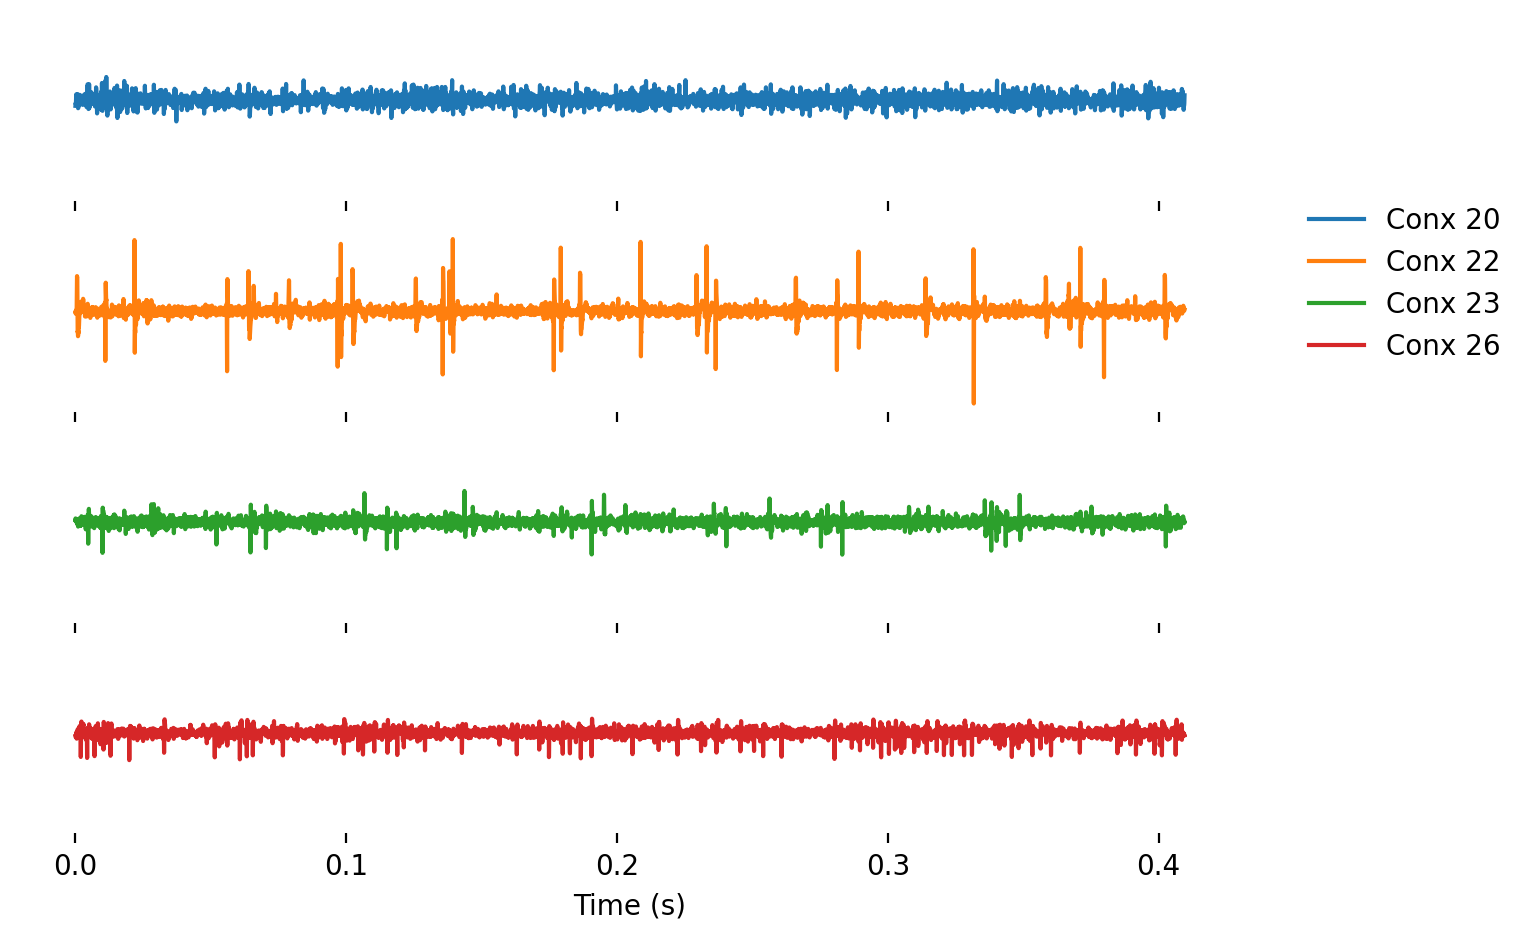

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = electrical_series.data[:10000, :]
timestamps = electrical_series.get_timestamps()[:10000]
df = pd.DataFrame(data)
df["Time (s)"] = timestamps
df.set_index("Time (s)", inplace=True)
df.columns.name = "electrodes"
channel_name_mapper = dict(zip(df.columns, electrical_series.electrodes["channel_name"][:]))
df.rename(channel_name_mapper, axis=1, inplace=True)

fig, axes = plt.subplots(nrows=len(df.columns), sharex=True, sharey=True, dpi=200)
lines = df.plot(subplots=True, ax=axes, legend=False)

# Hide y-axis labels
for ax in axes:
    ax.yaxis.set_visible(False)

# Remove box around the plots
for ax in axes:
    ax.set_frame_on(False)

# Get handles and labels for all lines
handles, labels = [], []
for line in lines:
    h, l = line.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Create a single legend box
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 0.8), frameon=False)
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

The electrodes table describe the electrodes that generated this data. Extracellular electrodes are stored in an "electrodes" table, which is a [DynamicTable](https://hdmf.readthedocs.io/en/stable/hdmf.common.table.html#hdmf.common.table.DynamicTable) and can be can be converted to a pandas DataFrame for convenient analysis using `nwbfile.electrodes.to_dataframe()`.

In [187]:
nwbfile.electrodes.to_dataframe()

,location,group,group_name,channel_name,gain_to_uV,offset_to_uV,channel_ids,electrode_type,chamber_type,chamber_x,chamber_y,chamber_z,acx_x,acx_y,acx_z
id,,,,,,,,,,,,,,,
0,GPi,Group GPi pynwb.ecephys.ElectrodeGroup at 0x50...,Group GPi,Conx 20,1.0,0.0,20,vp16,Sagittal,-1.0,5.0,45.30,-8.710117,-4.341093,0.092948
1,GPi,Group GPi pynwb.ecephys.ElectrodeGroup at 0x50...,Group GPi,Conx 22,1.0,0.0,22,vp16,Sagittal,-1.0,5.0,45.60,-8.693499,-4.499198,-0.161466
2,GPi,Group GPi pynwb.ecephys.ElectrodeGroup at 0x50...,Group GPi,Conx 23,1.0,0.0,23,vp16,Sagittal,-1.0,5.0,45.75,-8.685190,-4.578251,-0.288674
3,GPi,Group GPi pynwb.ecephys.ElectrodeGroup at 0x50...,Group GPi,Conx 26,1.0,0.0,26,vp16,Sagittal,-1.0,5.0,44.55,-8.751660,-3.945831,0.728984


## Filtered ElectricalSeries


The processed ecephys data is stored in "processing/ecephys" which can be accessed as `nwbfile.processing["ecephys"]`.
Within this processing module we can access the container of filtered traces as `nwbfile.processing["ecephys"]["Processed"]` which can hold multiple processed `ElectricalSeries` objects.


In [188]:
nwbfile.processing["ecephys"]

ecephys pynwb.base.ProcessingModule at 0x5083282896
Fields:
  data_interfaces: {
    Processed <class 'pynwb.ecephys.FilteredEphys'>
  }
  description: Intermediate data from extracellular electrophysiology recordings, e.g., LFP.

In [192]:
processed_ecephys = nwbfile.processing["ecephys"]["Processed"]

filtered_electrical_series = processed_ecephys["ElectricalSeriesProcessedGPi"]
filtered_electrical_series

ElectricalSeriesProcessedGPi pynwb.ecephys.ElectricalSeries at 0x5010966480
Fields:
  comments: no comments
  conversion: 1e-06
  data: <HDF5 dataset "data": shape (33588268, 4), type "<f4">
  description: High-pass filtered traces (200 Hz) from GPi region.
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  filtering: Equiripple High-pass filter designed using the FIRPM function in MATLAB with a stop-band frequency of 200 Hz, a pass-band frequency of 300 Hz, a stop-band attenuation of 0.0001 dB, a pass-band ripple of 0.057501127785 dB, and a density factor of 20.
  offset: 0.0
  rate: 24414.0625
  resolution: -1.0
  starting_time: 9.5367431640625e-07
  starting_time_unit: seconds
  unit: volts

# Access Units <a name="access-units"></a>

Spike times are stored in the `Units` table, which is a DynamicTable and can be can be converted to a pandas DataFrame for convenient analysis using `nwbfile.units.to_dataframe()`.


In [191]:
nwbfile.units[:]

,spike_times,unit_name,sort_label,location,channel_ids,unit_quality_post_sorting
id,,,,,,
0,"[2.70639104, 9.90437376, 10.7485184, 25.959055...",0,1.0,GPi,20,F
1,"[0.02125824, 0.09744384, 0.17870848, 0.2081587...",1,1.0,GPi,22,excellent
2,"[0.01036288, 0.055296, 0.09613312, 0.1349632, ...",2,2.0,GPi,22,good
3,"[0.10190848, 0.13770752, 0.1859584, 0.26558464...",3,3.0,GPi,22,good
4,"[0.063488, 0.0784384, 0.72880128, 1.0031104, 1...",4,4.0,GPi,22,good
5,"[0.1062912, 0.19480576, 0.33542144, 0.34828288...",5,1.0,GPi,23,excellent
6,"[0.00405504, 0.00933888, 0.0514048, 0.06397952...",6,2.0,GPi,23,good
7,"[0.00131072, 0.00364544, 0.0063488, 0.00970752...",7,1.0,GPi,26,excellent


### Interactive visualization of spike times

![Showing a raster plot in Neurosift](images/neurosift_units.png)

Visit [Neurosift](https://neurosift.app/?p=/nwb&url=https://api.dandiarchive.org/api/assets/2bf73c66-8534-4d9a-bee5-a42025dea7a2/download/&dandisetId=000947&dandisetVersion=draft&tab=view:DirectRasterPlot|/units&tab-time=146.82820800814233,157.46102593869216,undefined)

### PSTH  <a name="view-PSTH"></a>

In this example we will show the activity of one single unit sampled from GPi and aligned to the time of movement onset.

We will use [Pynapple](https://pynapple-org.github.io/pynapple/) to compute and visualize the PSTH using the `pynapple.compute_perievent()` method.

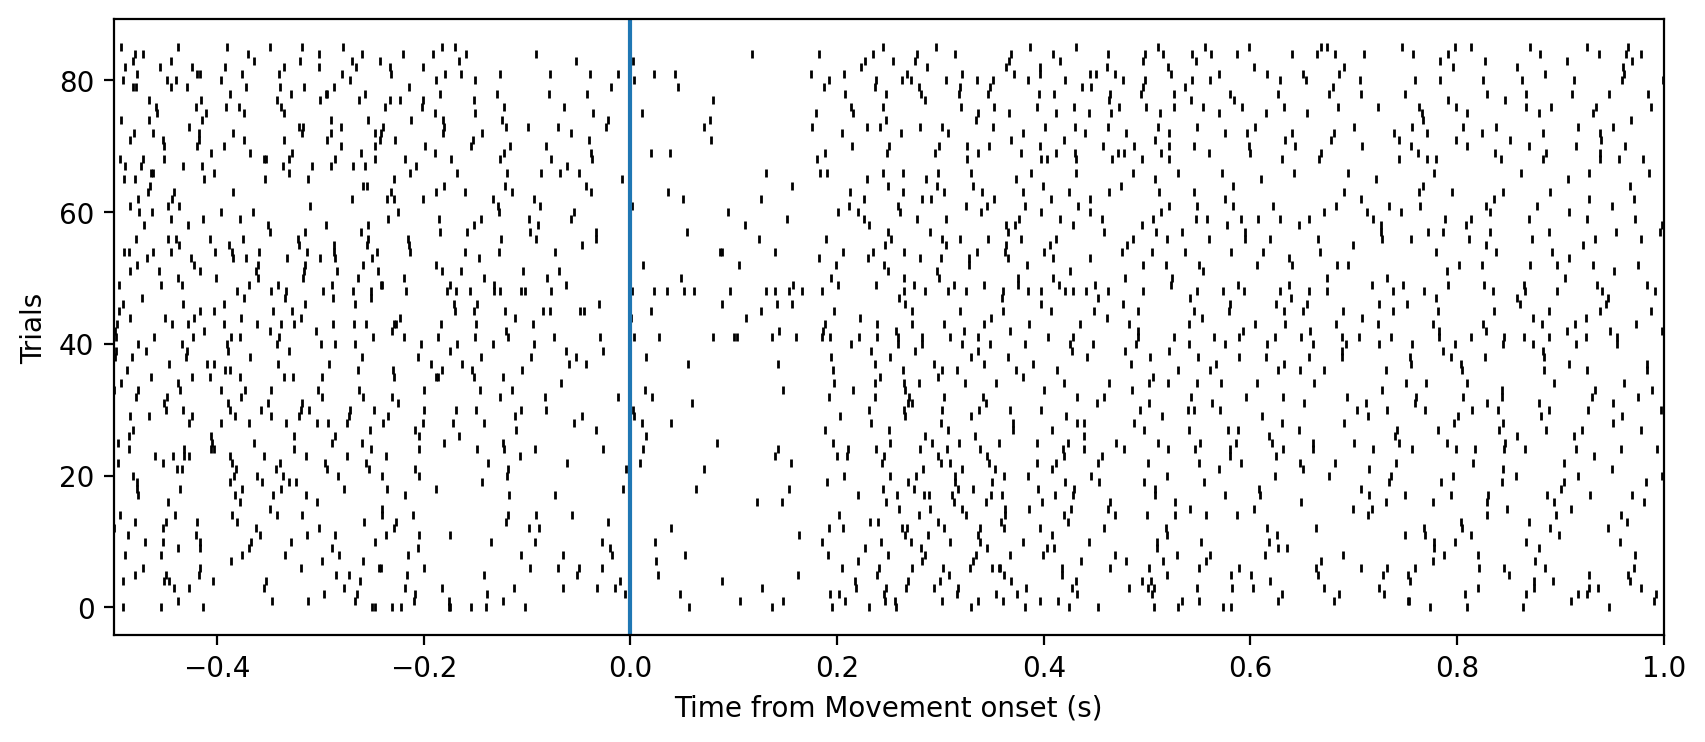

In [182]:
from matplotlib import pyplot as plt
import pynapple as nap

movement_onset_ts = nap.Ts(nwbfile.trials["movement_start_time"][:], time_units="s")
spike_times_group = nap.TsGroup({unit_ind: nap.Ts(spikes) for unit_ind, spikes in enumerate(nwbfile.units["spike_times"])})

perievent_histogram = nap.compute_perievent(
    data=spike_times_group,
    tref=movement_onset_ts,
    minmax=(-0.5, 1),
    time_unit="s",
)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=200)

ax.plot(
    perievent_histogram[4].to_tsd(),
    "|",
    color="black",
    markersize=3,
)
plt.xlabel("Time from Movement onset (s)")
plt.ylabel("Trials")
plt.xlim(-0.5, 1)
plt.axvline(0.0)
plt.show()


We can also use [Neurosift](https://neurosift.app/?p=/nwb&url=https://api.dandiarchive.org/api/assets/2bf73c66-8534-4d9a-bee5-a42025dea7a2/download/&dandisetId=000947&dandisetVersion=draft&tab=view:PSTH|/intervals/trials&tab-time=undefined,undefined,undefined) for this visualization:

![Showing PSTH in Neurosift](images/neurosift_psth.png)
